<a href="https://colab.research.google.com/github/Criell/Data/blob/master/simple_multiperceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple MultiPerceptron training algorithm

In [ ]:
# use this code snippet to upload the mat file to google colab 
# The dataset will be stored in the variables X and Y

import scipy.io as sio
import numpy as np

#import os.path
#if not os.path.isfile('training_data.mat'):

!wget https://github.com/Criell/Data/blob/master/01_AI_Basics/training_data.mat?raw=true
!mv training_data.mat\?raw\=true training_data.mat
  
data = sio.loadmat('training_data.mat')
X = np.array(data['X'])
X = np.append(X.T, np.ones((X.shape[1],1)),axis = 1)
X = np.float32(X)
Y = np.array(data['Y'])
Y = np.float32(Y)

print('Training data shape:',X.shape)
print('Labels shape:', Y.shape)

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline  

--2020-06-19 17:20:59--  https://github.com/Criell/Data/blob/master/01_AI_Basics/training_data.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Criell/Data/raw/master/01_AI_Basics/training_data.mat [following]
--2020-06-19 17:21:00--  https://github.com/Criell/Data/raw/master/01_AI_Basics/training_data.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Criell/Data/master/01_AI_Basics/training_data.mat [following]
--2020-06-19 17:21:00--  https://raw.githubusercontent.com/Criell/Data/master/01_AI_Basics/training_data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connecte

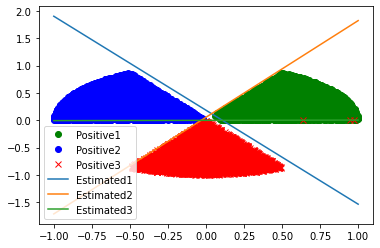

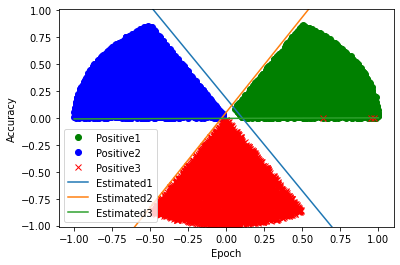

In [ ]:
lrate = 0.03
cv = 0.9998

class MultiPerceptron:
    
    # input_size: dimension of the input including bias
    def __init__(self,input_size):
      
        # we store the input size because we will need it later
        self.input_size = input_size
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w1 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w2 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w3 = np.random.randn(input_size,1).reshape(input_size,1)
        
        self.learning_rate = lrate
        self.bias = np.random.rand(1) 
        
        # we will store our accuracy after each iteration here
        self.history1 = []
        self.history2 = []
        self.history3 = []
        
        self.statistics = []
       

    def computeY(self, BY,label):
        size = len(BY)
        Y = np.zeros(shape=(size,1))
        Y = np.float32(Y)
        for i in range (len(BY)):
          if BY[i]==label:
            Y[i]=1
        return Y

    def XW (self, X, i, w):
      
        activationsum = 0
        for j in range(self.input_size):
          activationsum = sum (activationsum + w[j] * X[i,j]) 
        activationsum + self.bias
        return activationsum
      
    def weight (self, X, Y, prediction, i, w):
                        
        for j in range(self.input_size):           
          e = Y[i] - prediction
          lr = self.learning_rate * e * X[i,j]
          w[j] = w[j] + lr
              
    def train(self, X, Y, w, history, max_epochs = 100):
      
        # we clear history each time we start training
        history = []
        
        converged = False
        epochs = 0
        
        while not converged and epochs < max_epochs :

            # TODO              
            # 1. add training code here that updates self.w 
            
            i = 0  #number of label
            
            while i!=Y.shape[0]:
        
              activation = self.XW(X, i, w)
              
              if activation < 0: 
                prediction = 0
              else:
                prediction = 1
              
              self.weight (X, Y, prediction, i, w)

              i=i+1
  
            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y,w,history) 
            
            # 2.  a criteria to set converged to True under the correct circumstances. 
            j = len(history)-1
            
            if history[j] > cv:
              converged = True
            
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged")
        
        self.statistics.append([epochs, history])
        self.plot_training_history()
        

    def trainAll(self, X, Y):
        Y1 = self.computeY(Y,0)
        self.train(X, Y1, self.w1, self.history1)

        Y2 = self.computeY(Y,1)
        self.train(X, Y2, self.w2, self.history2)

        Y3 = self.computeY(Y,2)      
        self.train(X, Y3, self.w3, self.history3)
      
      
    # The draw function plots all the points and our current estimate 
    # of the boundary between the two classes. Point are colored according to
    # the current output of the classifier. Ground truth boundary is also
    # plotted since we know how we generated the data
    
    def draw(self,X):
      
        pl.close()
        out1 = np.matmul(X,self.w1).squeeze()
        out2 = np.matmul(X,self.w2).squeeze()
        out3 = np.matmul(X,self.w3).squeeze()
        
        P1 = X[out1 >= 0,:]
        P2 = X[out2 >= 0,:]
        P3 = X[out3 >= 0,:]
        
        x = np.linspace(-1,1)
        
        pl.xlim((-1,1))
        pl.ylim((-1,1))
 
        pl.plot(P1[:,0],P1[:,1],'go', label = 'Positive1')
        pl.plot(P2[:,0],P2[:,1],'bo', label = 'Positive2')
        pl.plot(P3[:,0],P3[:,1],'rx', label = 'Positive3')
        
        a = self.w1[0]
        b = self.w1[1]
        c = self.w1[2]
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated1')
        
        a = self.w2[0]
        b = self.w2[1]
        c = self.w2[2]
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated2')
        
        a = self.w3[0]
        b = self.w3[1]
        c = self.w3[2]
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated3')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y,w,history):
        out = np.matmul(X,w)
        Y_bar = (out >= 0)
        accuracy = np.sum(Y==Y_bar)/np.float(Y_bar.shape[0])
        history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
      self.draw(X)
      plt.ylim((-1.01,1.01))
      plt.plot(np.arange(len(self.history1))+1, np.array(self.history1),'-o')
      plt.plot(np.arange(len(self.history2))+1, np.array(self.history2),'-x')
      plt.plot(np.arange(len(self.history3))+1, np.array(self.history3),'-v')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()

mp1 = MultiPerceptron(3)
mp1.trainAll(X,Y)

[0, 1, 2, 3, 4]
[0, 0.8304456512369622, 0.9261486078786311, 0.9835143522110164, 0.990949056115852]


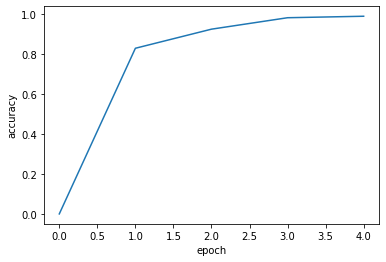

In [ ]:
x = []
y = []

x.append (0)
y.append (0)

for i in range (4):
  x.append (i+1)
  y.append ((mp1.statistics[0][1][i]+mp1.statistics[1][1][i]+mp1.statistics[2][1][i])/3)

print(x)
print(y)  

plt.plot(x,y)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
cv = 0.98
lrate = 0.04
class Perceptronlr:
    
    # input_size: dimension of the input including bias
    def __init__(self,input_size):
      
        # we store the input size because we will need it later
        self.input_size = input_size
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w = np.random.randn(input_size,1).reshape(input_size,1)
        self.learning_rate = lrate
        self.bias = np.random.rand(1) 
        
        # we will store our accuracy after each iteration here
        self.history = []
        self.statistics = []
    
    def XW (self,X, i):
      
        activationsum = 0
        for j in range(self.input_size):
          activationsum = sum (activationsum + self.w[j] * X[i,j]) 
        activationsum + self.bias
        return activationsum
      
    def weight (self, X, Y, prediction, i):
                        
        for j in range(self.input_size):           
          e = Y[i] - prediction
          lr = self.learning_rate * e * X[i,j]
          self.w[j] = self.w[j] + lr
              
    def train(self,X,Y, max_epochs = 100):
      
        # we clear history each time we start training
        self.history = []
        
        converged = False
        epochs = 0
        
        while not converged and epochs < max_epochs :

            # TODO              
            # 1. add training code here that updates self.w 
            
            i = 0  #number of label
            
            while i!=Y.shape[0]:
        
              activation = self.XW(X, i, )
              
              if activation < 0: 
                prediction = 0
              else:
                prediction = 1
              
              self.weight (X, Y, prediction, i)

              i=i+1
  
            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y) 
            
            # 2.  a criteria to set converged to True under the correct circumstances. 
            j = len(self.history)-1
            
            if self.history[j] > cv:
              converged = True
            
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged")
          
        self.plot_training_history()
        self.statistics.append([Y.shape[0], epochs, self.history[j]])

    
    # The draw function plots all the points and our current estimate 
    # of the boundary between the two classes. Point are colored according to
    # the current output of the classifier. Ground truth boundary is also
    # plotted since we know how we generated the data
    
    def draw(self,X):
      
        pl.close()
        out = np.matmul(X,self.w).squeeze()
        
        P = X[out >= 0,:] 
        N = X[out.T < 0,:]
        
        x = np.linspace(-1,1)
        
        pl.xlim((-1,1))
        pl.ylim((-1,1))
 
        pl.plot(P[:,0],P[:,1],'go', label = 'Positive')
        pl.plot(N[:,0],N[:,1],'rx', label = 'Negative')
        pl.plot(x, x, label = 'GT')
        
        a = self.w[0]
        b = self.w[1]
        c = self.w[2]
        print (a,b,c)
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1)
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y):
        out = np.matmul(X,self.w)
        Y_bar = (out >= 0)
        accuracy = np.sum(Y==Y_bar)/np.float(Y_bar.shape[0])
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
      plt.ylim((-1.01,1.01))
      plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()

In [ ]:
for i in range (15468):
  if Y[i]==2:
    Y[i] = 0

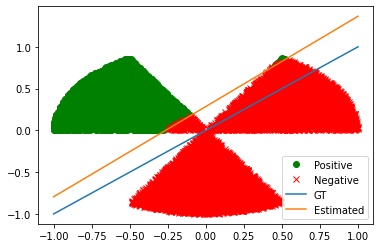

Qutting: Converged


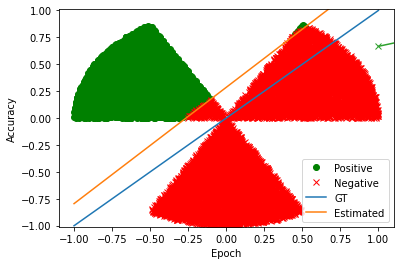

[0.6666666666666666, 0.9686449444013447, 0.9641194724592708, 0.975885699508663, 0.9834497026118438]
[[-0.09378552]
 [ 0.08681544]
 [-0.02478635]]


In [ ]:
p2 = Perceptronlr(3)
p2.train(X,Y, 100)
print(p2.history)
print(p2.w)

In [ ]:
for i in range (5155):
  if Y[i]==0:
    Y[i] = 1

for n in range (5156,10311):
  if Y[n]==1:
    Y[n] = 0

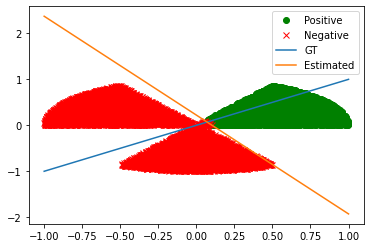

Qutting: Converged


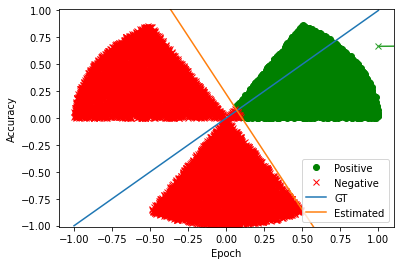

[0.6666666666666666, 0.6786268425135764, 0.932570468063098, 0.9965089216446859]
[[ 0.2346506 ]
 [ 0.10912714]
 [-0.02428723]]


In [ ]:
p3 = Perceptronlr(3)
p3.train(X,Y, 100)
print(p3.history)
print(p3.w)

In [ ]:
for i in range (10311):
    Y[i] = 0
    
for n in range (10311,15468):
    Y[n] = 1

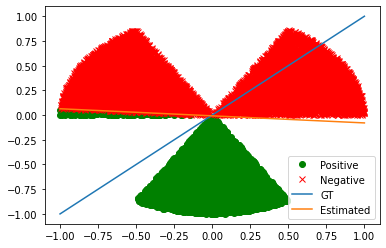

Qutting: Converged


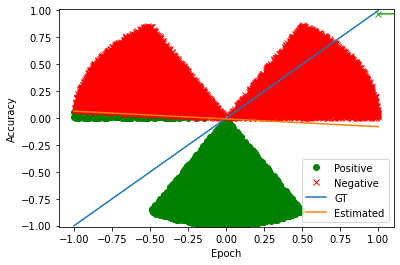

[0.9678691492112749, 0.9816395138350142]
[[-0.19548408]
 [-2.72683927]
 [-0.02083705]]


In [ ]:
p1 = Perceptronlr(3)
p1.train(X,Y, 100)
print(p1.history)
print(p1.w)

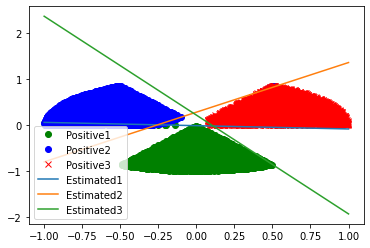

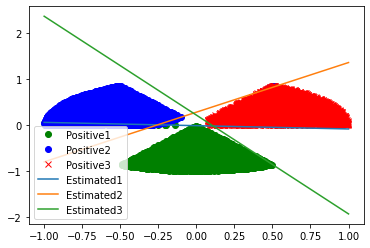

In [ ]:
pl.close()
out1 = np.matmul(X,p1.w).squeeze()
out2 = np.matmul(X,p2.w).squeeze()
out3 = np.matmul(X,p3.w).squeeze()
        
P1 = X[out1 >= 0,:]
P2 = X[out2 >= 0,:]
P3 = X[out3 >= 0,:]
        
x = np.linspace(-1,1)
        
pl.xlim((-1,1))
pl.ylim((-1,1))
 
pl.plot(P1[:,0],P1[:,1],'go', label = 'Positive1')
pl.plot(P2[:,0],P2[:,1],'bo', label = 'Positive2')
pl.plot(P3[:,0],P3[:,1],'rx', label = 'Positive3')
        
a = p1.w[0]
b = p1.w[1]
c = p1.w[2]
        
pl.plot(x, -a/b * x - c/b, label = 'Estimated1')
        
a = p2.w[0]
b = p2.w[1]
c = p2.w[2]
        
pl.plot(x, -a/b * x - c/b, label = 'Estimated2')
        
a = p3.w[0]
b = p3.w[1]
c = p3.w[2]
        
pl.plot(x, -a/b * x - c/b, label = 'Estimated3')
        
pl.axis('tight')
pl.legend()
        
display.clear_output(wait=True)
display.display(pl.gcf())